In [1]:
import pandas as pd
import pandas_profiling as profiling

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("./data/train.csv")
# df.describe()

profile = profiling.ProfileReport(df)
# profile

In [2]:
data = df.query('pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                'pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                'fare_amount > 0')

base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude',
                 'passenger_count']

X = data[base_features]
y = data.fare_amount

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=50, random_state=1).fit(X_train, y_train)

y_pred = first_model.predict(X_val)

score = r2_score(y_val, y_pred)
score

0.41968601515439785

In [6]:
X_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,23466.000000,23466.000000,23466.000000,23466.000000,23466.000000
mean,-73.976827,40.756931,-73.975359,40.757434,1.662320
std,0.014625,0.018206,0.015930,0.018659,1.290729
min,-73.999999,40.700013,-73.999999,40.700020,0.000000
25%,-73.987964,40.744901,-73.987143,40.745756,1.000000
50%,-73.979629,40.758076,-73.978588,40.758542,1.000000
75%,-73.967797,40.769602,-73.966459,40.770406,2.000000
max,-73.900062,40.799952,-73.900062,40.799999,6.000000


In [ ]:
y_train.describe()

In [ ]:
data.corr()

In [3]:
import eli5
from eli5.sklearn import PermutationImportance

# Make a small change to the code below to use in this problem. 
perm = PermutationImportance(first_model, random_state=1).fit(X_val, y_val)

# uncomment the following line to visualize your results
eli5.show_weights(perm, feature_names=base_features)

Weight,Feature
0.8387 ± 0.0168,dropoff_latitude
0.8326 ± 0.0212,pickup_latitude
0.5947 ± 0.0432,pickup_longitude
0.5326 ± 0.0275,dropoff_longitude
-0.0022 ± 0.0014,passenger_count


In [4]:
data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

new_features = ['pickup_longitude',
                'pickup_latitude',
                'dropoff_longitude',
                'dropoff_latitude',
                'abs_lon_change',
                'abs_lat_change',
                'passenger_count']

new_X = data[new_features]
new_y = data.fare_amount

new_X_train, new_X_val, new_y_train, new_y_val = train_test_split(new_X, new_y, random_state=1)
second_model = RandomForestRegressor(n_estimators=50, random_state=1).fit(new_X_train, new_y_train)

new_y_pred = second_model.predict(new_X_val)

score_2 = r2_score(new_y_val, new_y_pred)
score_2

0.4489856910907549

In [7]:
new_X_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,abs_lon_change,abs_lat_change,passenger_count
count,23466.000000,23466.000000,23466.000000,23466.000000,23466.000000,23466.000000,23466.000000
mean,-73.976827,40.756931,-73.975359,40.757434,0.013042,0.014827,1.662320
std,0.014625,0.018206,0.015930,0.018659,0.011674,0.012141,1.290729
min,-73.999999,40.700013,-73.999999,40.700020,0.000000,0.000000,0.000000
25%,-73.987964,40.744901,-73.987143,40.745756,0.004943,0.006030,1.000000
50%,-73.979629,40.758076,-73.978588,40.758542,0.010022,0.011650,1.000000
75%,-73.967797,40.769602,-73.966459,40.770406,0.017673,0.020410,2.000000
max,-73.900062,40.799952,-73.900062,40.799999,0.094065,0.094655,6.000000


In [8]:
# Make a small change to the code below to use in this problem. 
new_perm = PermutationImportance(second_model, random_state=1).fit(new_X_val, new_y_val)

# uncomment the following line to visualize your results
eli5.show_weights(new_perm, feature_names=new_features)

Weight,Feature
0.5672 ± 0.0248,abs_lat_change
0.4320 ± 0.0413,abs_lon_change
0.0609 ± 0.0196,dropoff_longitude
0.0600 ± 0.0167,pickup_longitude
0.0560 ± 0.0189,pickup_latitude
0.0492 ± 0.0084,dropoff_latitude
-0.0031 ± 0.0019,passenger_count


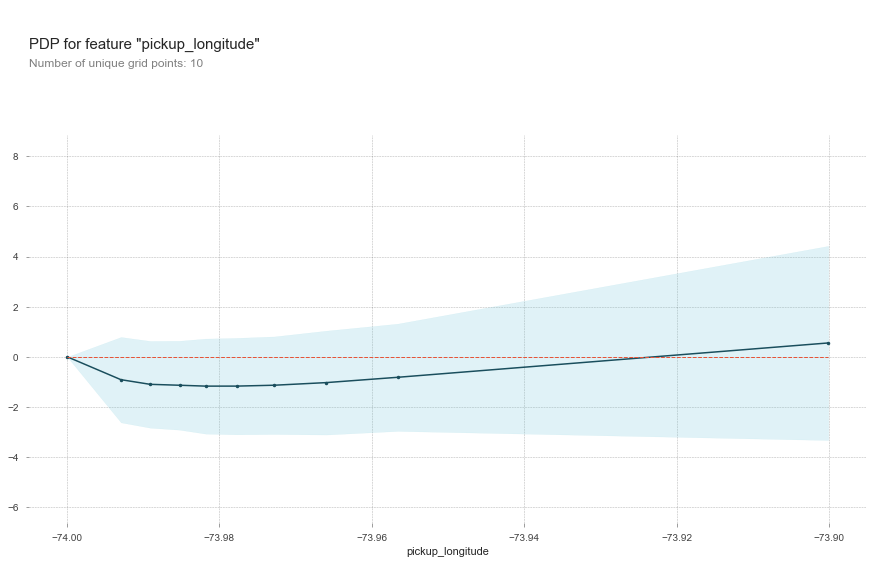

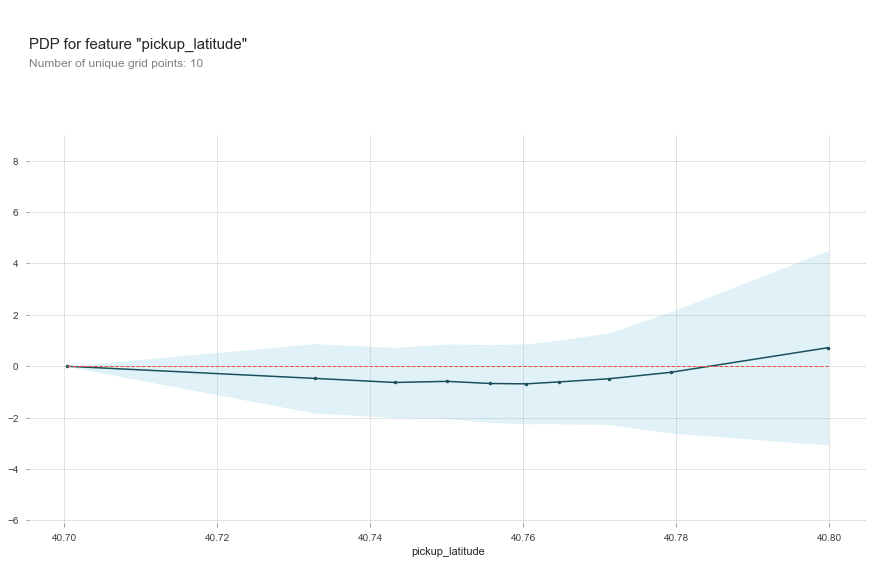

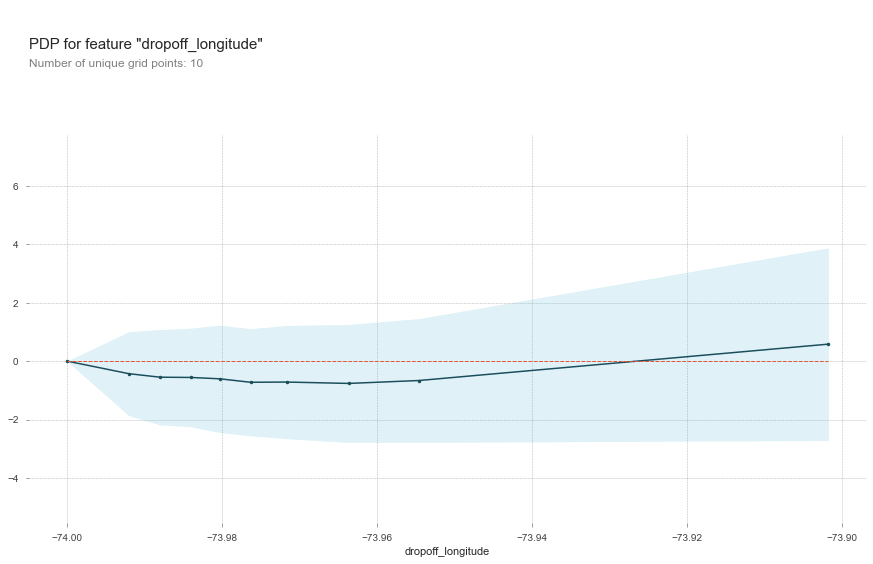

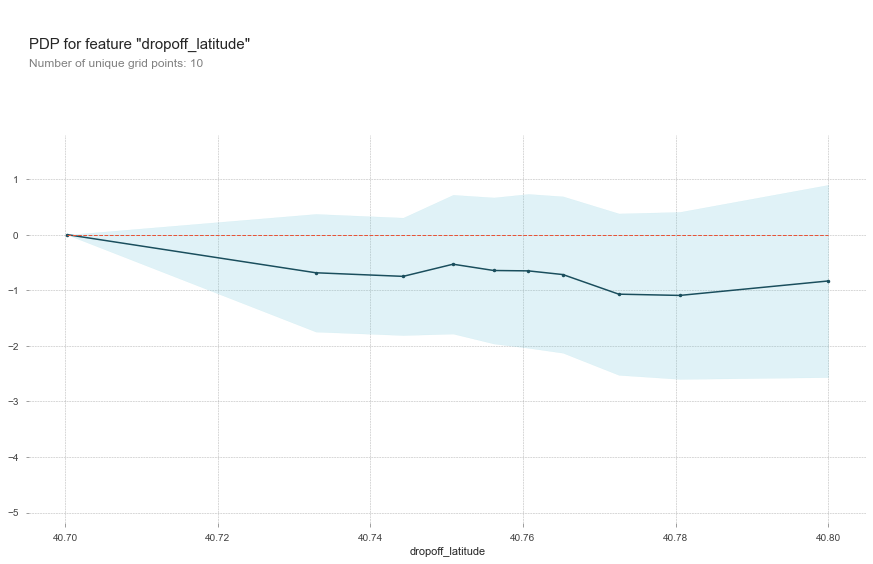

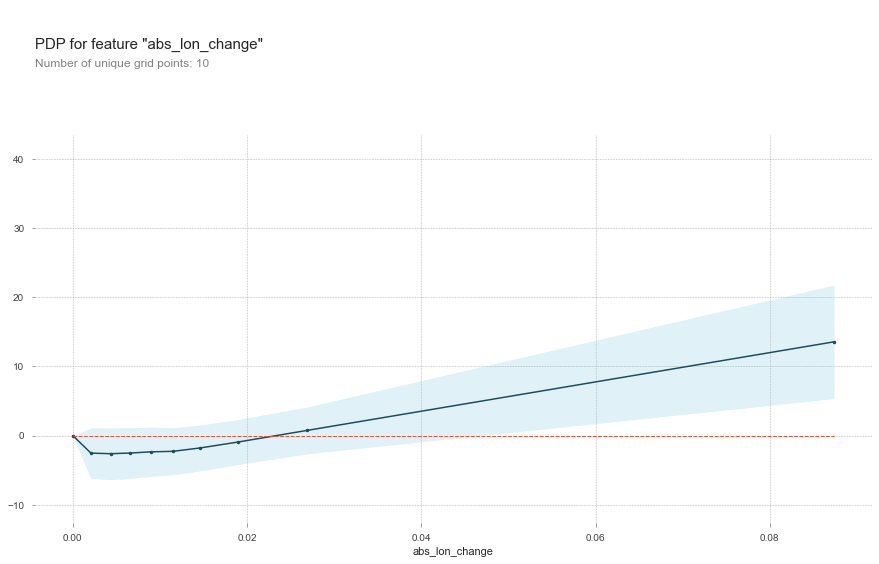

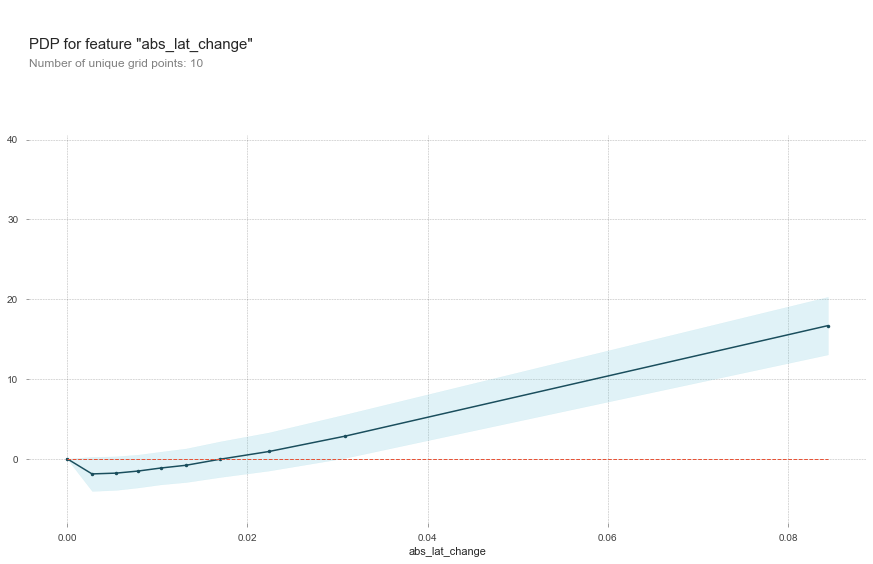

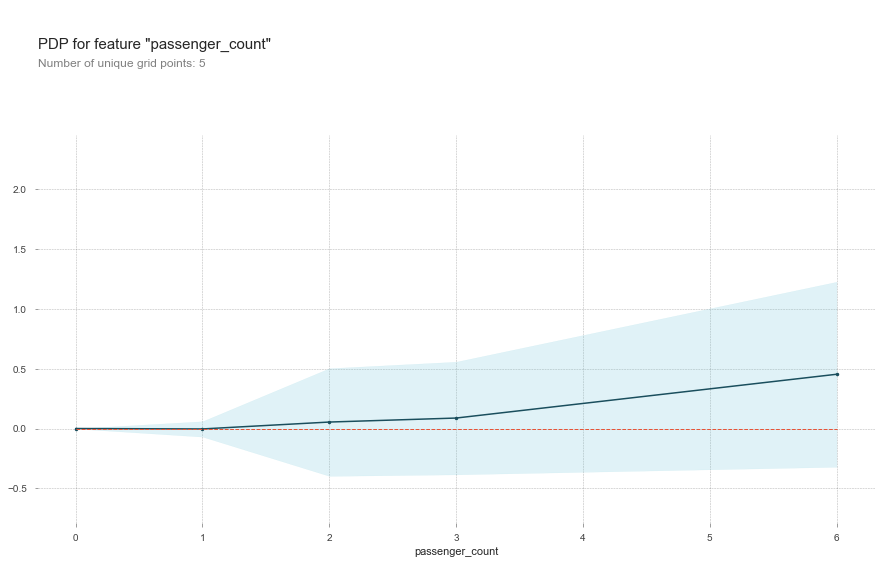

In [17]:
from matplotlib import pyplot as plt
from pdpbox import pdp, info_plots

for feat_name in new_features:
    pdp_dist = pdp.pdp_isolate(model=second_model, dataset=new_X_val, model_features=new_features, feature=feat_name)

    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

In [16]:
new_X_val

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,abs_lon_change,abs_lat_change,passenger_count
8494,-73.969030,40.754242,-73.981155,40.741227,0.012125,0.013015,1
36780,-73.975720,40.740650,-73.971070,40.793100,0.004650,0.052450,5
28200,-73.979424,40.747162,-73.980545,40.765682,0.001122,0.018520,1
31189,-73.982255,40.776455,-73.984172,40.770137,0.001917,0.006318,1
31359,-73.978441,40.785829,-73.978650,40.789373,0.000209,0.003544,1
...,...,...,...,...,...,...,...
40651,-73.988333,40.737408,-73.987815,40.721223,0.000518,0.016185,1
40536,-73.992832,40.737365,-73.991235,40.748905,0.001597,0.011540,1
6587,-73.998512,40.745012,-73.979422,40.781785,0.019090,0.036773,1
18920,-73.952263,40.772812,-73.975418,40.752380,0.023155,0.020432,2


In [20]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [56]:
from functools import reduce
import sys

candidates = [1, 2, 5, 7, 8]
model_maes = {i:-i**2 for i in candidates}
model_maes

{1: -1, 2: -4, 5: -25, 7: -49, 8: -64}

In [63]:
range?

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     
